In [30]:
import os
import pydicom
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from pathlib import Path
from skimage.io import imsave
from cv2 import cvtColor, COLOR_BGR2GRAY
from pydicom.pixel_data_handlers.util import convert_color_space


In [31]:
def load_file(filename):
    print(filename)
    dicom = pydicom.read_file(str(filename), force = True)
    vid = dicom.pixel_array
    vid = convert_color_space(vid, 'YBR_FULL', 'RGB')
    return vid

def write_frames(img_array, video_name, frames_dir, convert_to_grayscale = True):
    for i, frame in enumerate(img_array):
        output_filename = str(frames_dir) + '/' + str(video_name)[:-4] + "_" + str(i) + '.jpg'
#         output_filename = output_filename.encode('unicode_escape')
        if convert_to_grayscale:
            frame = cvtColor(frame, COLOR_BGR2GRAY)
#         print(frame.shape)
#         break
        imsave(output_filename,frame)

In [32]:
classes = {'apex', 'mitral', 'papillary'}

data_path = Path("/Users/idofarhi/Documents/Thesis/Data/test_set")

for view in classes:
    class_data_path = data_path.joinpath(view, 'dicom')
    assert(class_data_path.exists())
    
    frames_target_path = data_path.joinpath('frames', 'raw', view)
    
    # Validate frames_target_path exists:
    if not frames_target_path.exists():
        print("directory doesn't exist, creating it...")
        print(frames_target_path)
        os.makedirs(frames_target_path)
    
#     Go through each video and save all frames
    for video_name in tqdm(class_data_path.iterdir()):
        if video_name.name == ".DS_Store": continue
        video = load_file(class_data_path.joinpath(video_name))
        write_frames(video, video_name.name, frames_target_path, convert_to_grayscale = True)

directory doesn't exist, creating it...
/Users/idofarhi/Documents/Thesis/Data/test_set/frames/raw/papillary


/Users/idofarhi/Documents/Thesis/Data/test_set/papillary/dicom/F4QHBKI0.dcm
/Users/idofarhi/Documents/Thesis/Data/test_set/papillary/dicom/F4KJO58G.dcm
/Users/idofarhi/Documents/Thesis/Data/test_set/papillary/dicom/F4RJ7OPU.dcm
/Users/idofarhi/Documents/Thesis/Data/test_set/papillary/dicom/F4QJ1B9S.dcm
/Users/idofarhi/Documents/Thesis/Data/test_set/papillary/dicom/F4LJ6N1A.dcm
/Users/idofarhi/Documents/Thesis/Data/test_set/papillary/dicom/F4QJ1G20.dcm
/Users/idofarhi/Documents/Thesis/Data/test_set/papillary/dicom/F4QHMUKU.dcm
/Users/idofarhi/Documents/Thesis/Data/test_set/papillary/dicom/F4QJ5QRC.dcm
/Users/idofarhi/Documents/Thesis/Data/test_set/papillary/dicom/F4LK0M0E.dcm
/Users/idofarhi/Documents/Thesis/Data/test_set/papillary/dicom/F4LK4HHI.dcm
/Users/idofarhi/Documents/Thesis/Data/test_set/papillary/dicom/F4RJKC3I.dcm
/Users/idofarhi/Documents/Thesis/Data/test_set/papillary/dicom/F4KJO48E.dcm
/Users/idofarhi/Documents/Thesis/Data/test_set/papillary/dicom/F4QJ5O38.dcm
/Users/idofa

/Users/idofarhi/Documents/Thesis/Data/test_set/apex/dicom/F4RJKI3Q.dcm
/Users/idofarhi/Documents/Thesis/Data/test_set/apex/dicom/F4QHKB4A.dcm
/Users/idofarhi/Documents/Thesis/Data/test_set/apex/dicom/F4RJKE3M.dcm
/Users/idofarhi/Documents/Thesis/Data/test_set/apex/dicom/F4RJ7PQ0.dcm
/Users/idofarhi/Documents/Thesis/Data/test_set/apex/dicom/F4QHBMI2.dcm
/Users/idofarhi/Documents/Thesis/Data/test_set/apex/dicom/F4QH8H90.dcm
/Users/idofarhi/Documents/Thesis/Data/test_set/apex/dicom/F4QH8PP6.dcm
/Users/idofarhi/Documents/Thesis/Data/test_set/apex/dicom/F4QHBNI4.dcm
/Users/idofarhi/Documents/Thesis/Data/test_set/apex/dicom/F41DBOCI.dcm
/Users/idofarhi/Documents/Thesis/Data/test_set/apex/dicom/F4KKRH1G.dcm
/Users/idofarhi/Documents/Thesis/Data/test_set/apex/dicom/F41FHLK6.dcm
/Users/idofarhi/Documents/Thesis/Data/test_set/apex/dicom/F4KK3K90.dcm
/Users/idofarhi/Documents/Thesis/Data/test_set/apex/dicom/F41DPN8C.dcm
/Users/idofarhi/Documents/Thesis/Data/test_set/apex/dicom/F4LJ6Q9G.dcm
/Users

/Users/idofarhi/Documents/Thesis/Data/test_set/mitral/dicom/F4RJPE52.dcm
/Users/idofarhi/Documents/Thesis/Data/test_set/mitral/dicom/F4RJNAKM.dcm
/Users/idofarhi/Documents/Thesis/Data/test_set/mitral/dicom/F4LK0K0A.dcm
/Users/idofarhi/Documents/Thesis/Data/test_set/mitral/dicom/F4LK4DPC.dcm
/Users/idofarhi/Documents/Thesis/Data/test_set/mitral/dicom/F4QJ2MAM.dcm
/Users/idofarhi/Documents/Thesis/Data/test_set/mitral/dicom/F4QHMTKS.dcm
/Users/idofarhi/Documents/Thesis/Data/test_set/mitral/dicom/F4QH8IH2.dcm
/Users/idofarhi/Documents/Thesis/Data/test_set/mitral/dicom/F41FHHS0.dcm
/Users/idofarhi/Documents/Thesis/Data/test_set/mitral/dicom/F4QHK5S2.dcm
/Users/idofarhi/Documents/Thesis/Data/test_set/mitral/dicom/F4RJ7NPS.dcm
/Users/idofarhi/Documents/Thesis/Data/test_set/mitral/dicom/F4QJ1DPU.dcm
/Users/idofarhi/Documents/Thesis/Data/test_set/mitral/dicom/F4QJ49QS.dcm
/Users/idofarhi/Documents/Thesis/Data/test_set/mitral/dicom/F4QJ2HAE.dcm
/Users/idofarhi/Documents/Thesis/Data/test_set/mitr

In [36]:
from matplotlib.pyplot import imread
image = imread('../Data/frames/apex/E1UB4SG2_0.jpg')

In [37]:
image.shape

(434, 636)

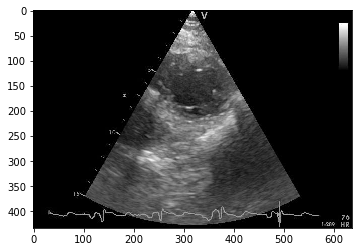

In [39]:
plt.imshow(image, cmap = 'gray')